In [55]:
# import standard lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import MinMaxScaler

# necessary to import the own modules
import importlib 
import sys
sys.path.append("C:/Users/Leon/Documents/AI_project/AI_project")

# import own modules
from Data_analysis.utils import data_analysis as da

## Load dataset

In [17]:
vegis_data = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegis_traindata_280324.csv", index_col=None)
# store image names only for debugging reasons - then assignment possible
images = vegis_data.pop("Image")
display(vegis_data.head())

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,sym_vertical,sym_horizontal,Label
0,125,70,117,72,53,0,0,0.647600,0.497062,29,7.931567,0.80,0.74,Zwiebel
1,100,97,93,63,61,0,29,0.658969,0.448148,29,12.216910,0.90,1.00,Zwiebel
2,108,103,131,89,62,0,3,0.780295,0.826132,38,16.189532,0.86,0.88,Zwiebel
3,115,104,126,88,64,0,51,0.615217,0.330286,22,16.265382,0.79,0.78,Zwiebel
4,141,101,141,119,98,0,223,0.362615,0.112285,25,9.326496,0.45,0.43,Zwiebel


**first quick data overview**<br>
In total we have:
> - 14 columns
> - 2155 entries
> - no non-null entries

In [19]:
vegis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hight               2155 non-null   int64  
 1   Width               2155 non-null   int64  
 2   R                   2155 non-null   int64  
 3   G                   2155 non-null   int64  
 4   B                   2155 non-null   int64  
 5   green pixels        2155 non-null   int64  
 6   green onion pixels  2155 non-null   int64  
 7   ratio area          2155 non-null   float64
 8   circularity         2155 non-null   float64
 9   keypoints           2155 non-null   int64  
 10  mean keypoints      2155 non-null   float64
 11  sym_vertical        2155 non-null   float64
 12  sym_horizontal      2155 non-null   float64
 13  Label               2155 non-null   object 
dtypes: float64(5), int64(8), object(1)
memory usage: 235.8+ KB


**Check duplicated data**

In [24]:
vegis_data_copy = vegis_data.copy()
print("Number of duplicated rows: ", vegis_data_copy.duplicated().sum())
# get all duplicated rows
vegis_data_copy.loc[vegis_data_copy.duplicated(keep=False)]

# remove only the second occurrence
print("shape before: ", vegis_data_copy.shape)
vegis_data_copy = vegis_data_copy.drop_duplicates()
print("shape after: ", vegis_data_copy.shape)

Number of duplicated rows:  2
shape before:  (2155, 14)
shape after:  (2153, 14)


In [25]:
vegis_data_copy.columns

Index(['Hight', 'Width', 'R', 'G', 'B', 'green pixels', 'green onion pixels',
       'ratio area', 'circularity', 'keypoints', 'mean keypoints',
       'sym_vertical', 'sym_horizontal', 'Label'],
      dtype='object')

**create a new feature** ***width_height_ratio*** **from the** ***height*** **and** ***width*** **feature**<br>
background: the photos were taken in different distances to the vegi. The image_preproccesing locate the vegi in the image and draws a bounding box around it. If the photo was taken with a bigger distance to the vegi than the width and height from the bounding box is smaller and vice versa. The ratio of these two feature should compense the difference.

In [26]:
df = vegis_data_copy.assign(ratio_w_h = vegis_data_copy["Width"] / vegis_data_copy["Hight"])
df.head()
# for now keep the originally height and width feature because later we can check if there are now differences in the distribution

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,sym_vertical,sym_horizontal,Label,ratio_w_h
0,125,70,117,72,53,0,0,0.647600,0.497062,29,7.931567,0.80,0.74,Zwiebel,0.560000
1,100,97,93,63,61,0,29,0.658969,0.448148,29,12.216910,0.90,1.00,Zwiebel,0.970000
2,108,103,131,89,62,0,3,0.780295,0.826132,38,16.189532,0.86,0.88,Zwiebel,0.953704
3,115,104,126,88,64,0,51,0.615217,0.330286,22,16.265382,0.79,0.78,Zwiebel,0.904348
4,141,101,141,119,98,0,223,0.362615,0.112285,25,9.326496,0.45,0.43,Zwiebel,0.716312


**show the number of each vegi class**

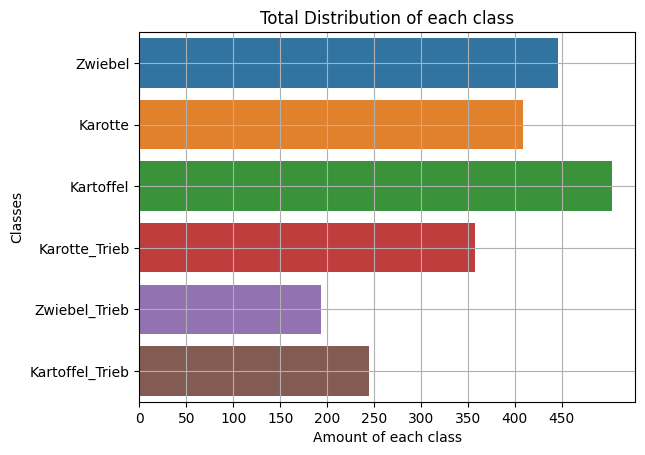

In [38]:
ax = sns.countplot(y=df['Label'], data=df)
plt.title("Total Distribution of each class")
plt.xlabel("Amount of each class")
plt.ylabel("Classes")
plt.grid()
plt.xticks(np.arange(0,500, step=50))
plt.show()

**First, get a total overview of the data distribution**

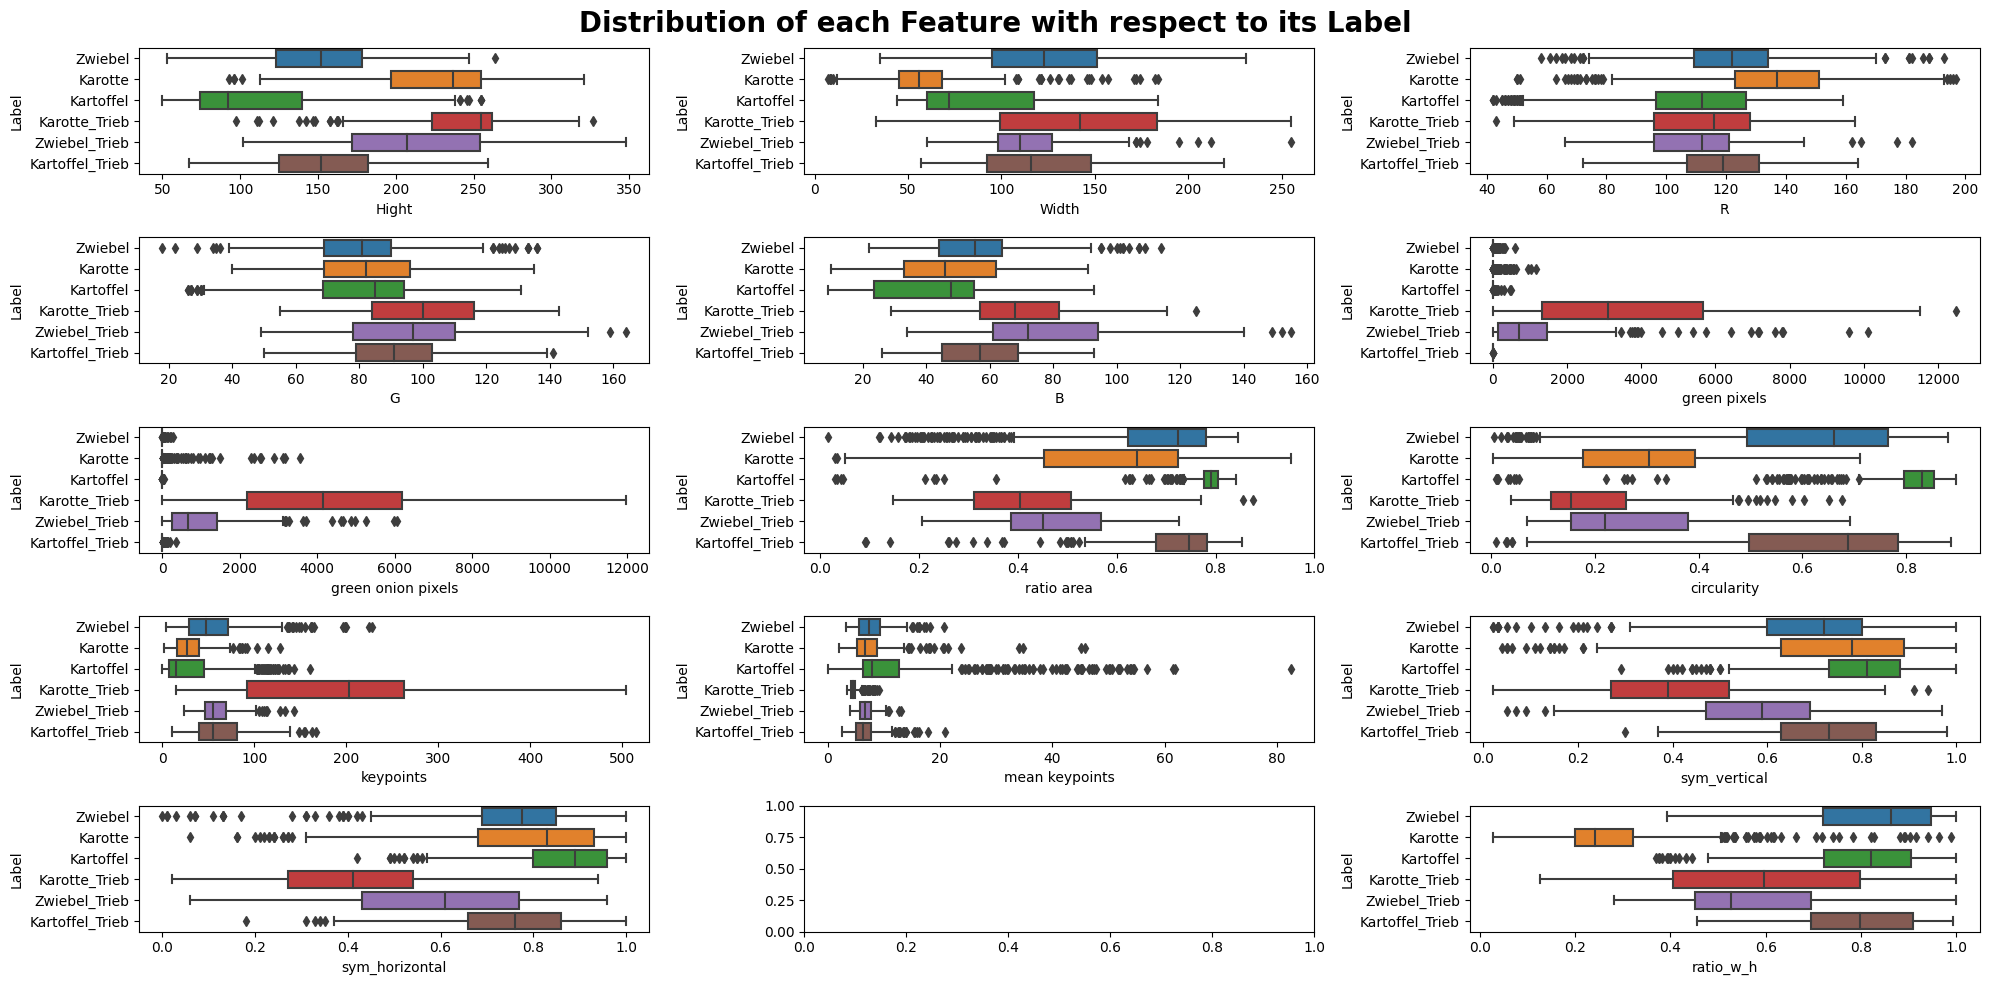

In [37]:
cols = df.columns.to_list()
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    if col == "Label":
        continue
    sns.boxplot(data=df, y="Label", x=col, ax=axes[i])

plt.suptitle("Distribution of each Feature with respect to its Label", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

**examine the differences of** *green_pixels* **and** *green onion pixels* **and select the feature which can better distinct the labels**  

In [43]:
sns.barplot(df, x="Label", y=["green pixels", "green onion pixels"], estimator="sum")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [58]:
sns.__version__

'0.12.2'

,Label,green pixels,green onion pixels
0,Karotte,12653,41966
1,Karotte_Trieb,1285578,1520803
2,Kartoffel,2133,96
3,Kartoffel_Trieb,14,1766
4,Zwiebel,4330,1502
5,Zwiebel_Trieb,247099,214734


,Label,log10_green_pixels,log10_green_onion_pixels
0,Karotte,4.102194,4.622898
1,Karotte_Trieb,6.109098,6.182073
2,Kartoffel,3.328991,1.982271
3,Kartoffel_Trieb,1.146128,3.246991
4,Zwiebel,3.636488,3.176670
5,Zwiebel_Trieb,5.392871,5.331901


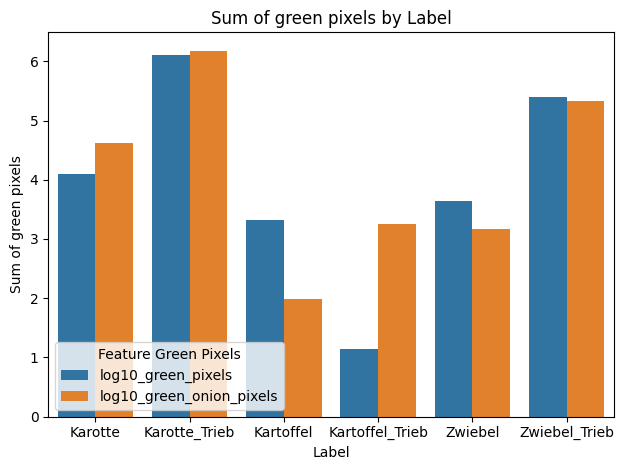

In [72]:
df_grouped = df.groupby('Label')[['green pixels', 'green onion pixels']].sum().reset_index()
display(df_grouped)
df_grouped = df_grouped.assign(log10_green_pixels=np.log10(df_grouped["green pixels"]),
                                log10_green_onion_pixels=np.log10(df_grouped["green onion pixels"])).drop(columns=["green pixels", "green onion pixels"])
display(df_grouped)

sum_df = df_grouped.melt(id_vars='Label', var_name='green', value_name='Sum')

sns.barplot(data=sum_df, x='Label', y='Sum', hue='green')
plt.xlabel('Label')
plt.ylabel('Sum of green pixels')
plt.title('Sum of green pixels by Label')
plt.legend(title='Feature Green Pixels', loc='lower left')
plt.tight_layout()
plt.show()

